# Titanic Survival

### Setup - (libraries and settings)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Titanic Data
---

In [2]:
titanic_data = pd.read_csv("../datasets/train.csv")

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exploratory Data Analysis
---

In [4]:
# Describe data with basic statistical metrics
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


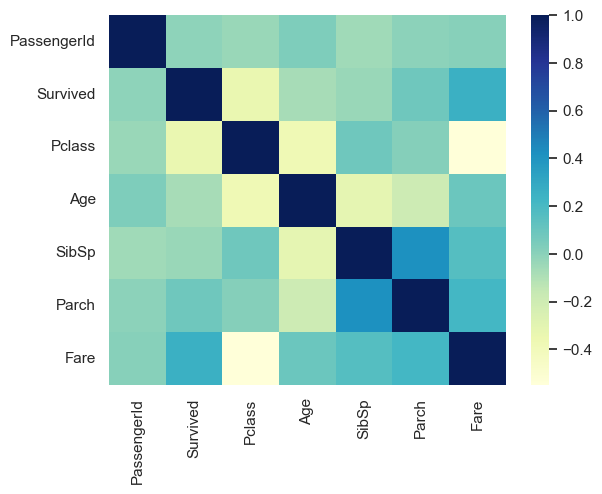

In [5]:
""" 
Pearson's correlation coefficient - Measures how strongly two variables are related to each other and in which direction they are in.
Range: -1 to +1

+1 means a perfect positive linear relationship
0 means no linear relationship
-1 means a perfect negative linear relationship

Note: Pearson's correlation coefficient does not account for non-linear patterns

Pandas Function:
    pd.DataFrame.corr()
"""

sns.heatmap(titanic_data.corr(numeric_only = True), cmap = "YlGnBu")
plt.show()

### Splitting Dataset
---

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit()
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

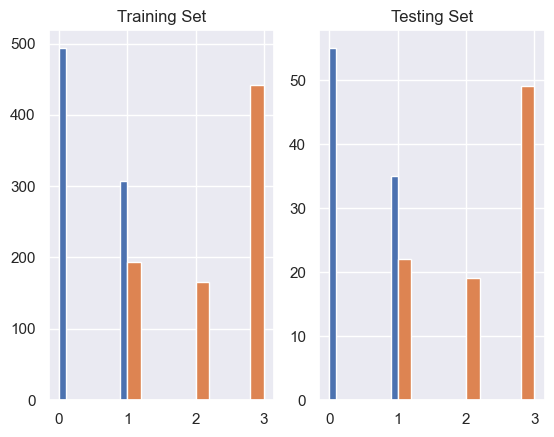

In [72]:
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Training Set")
ax1.set_xlabel("Pclass")
ax1.set_xlabel("Pclass")

strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Testing Set")

strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

In [8]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 341 to 824
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  801 non-null    int64  
 1   Survived     801 non-null    int64  
 2   Pclass       801 non-null    int64  
 3   Name         801 non-null    object 
 4   Sex          801 non-null    object 
 5   Age          642 non-null    float64
 6   SibSp        801 non-null    int64  
 7   Parch        801 non-null    int64  
 8   Ticket       801 non-null    object 
 9   Fare         801 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     799 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 81.4+ KB


### Imputing Missing Data
---

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        return self

    def transform(self, X): # X is the pandas dataframe
        """Imputes values in the Age column using the mean"""
        imputer = SimpleImputer(strategy = "mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [14]:
"""
One-Hot Encoding - A method to convert categorical variables into a format that machine learning models can understand. 

How it Works:
    Simply one-hot encoding turns each category into its own binary column. Only one column is considered "hot" (1) at a time for each row -
    all others are 0.
"""

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[["Sex"]]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [15]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors = "ignore")
    

### Creating Prepoccessing Pipeline
---

In [16]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])

In [17]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [18]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
341,342,1,1,24.000000,3,2,263.0000,0.0,0.0,1.0,1.0,0.0
351,352,0,1,29.710545,0,0,35.0000,0.0,0.0,1.0,0.0,1.0
643,644,1,3,29.710545,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
12,13,0,3,20.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
23,24,1,1,28.000000,0,0,35.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,1,1,29.710545,0,0,35.5000,0.0,0.0,1.0,0.0,1.0
707,708,1,1,42.000000,0,0,26.2875,0.0,0.0,1.0,0.0,1.0
74,75,1,3,32.000000,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
408,409,0,3,21.000000,0,0,7.7750,0.0,0.0,1.0,0.0,1.0


In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 341 to 824
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  801 non-null    int64  
 1   Survived     801 non-null    int64  
 2   Pclass       801 non-null    int64  
 3   Age          801 non-null    float64
 4   SibSp        801 non-null    int64  
 5   Parch        801 non-null    int64  
 6   Fare         801 non-null    float64
 7   C            801 non-null    float64
 8   S            801 non-null    float64
 9   Q            801 non-null    float64
 10  Female       801 non-null    float64
 11  Male         801 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 81.4 KB


In [21]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis = 1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

### Modeling (Random Forest)
---

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500, 600], 
     "max_depth": [None, 5, 10, 15, 20], 
     "min_samples_split": [2, 3, 4, 5, 6]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 4, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data, y_data)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [48]:
final_clf = grid_search.best_estimator_

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [39]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
489,490,1,3,9.000000,1,1,15.9000,0.0,0.0,1.0,0.0,1.0
183,184,1,2,1.000000,2,1,39.0000,0.0,0.0,1.0,0.0,1.0
534,535,0,3,30.000000,0,0,8.6625,0.0,0.0,1.0,1.0,0.0
284,285,0,1,29.597222,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
675,676,0,3,18.000000,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
627,628,1,1,21.000000,0,0,77.9583,0.0,0.0,1.0,1.0,0.0
398,399,0,2,23.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
810,811,0,3,26.000000,0,0,7.8875,0.0,0.0,1.0,0.0,1.0
316,317,1,2,24.000000,1,0,26.0000,0.0,0.0,1.0,1.0,0.0


In [40]:
X_test = strat_test_set.drop(["Survived"], axis = 1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [49]:
final_clf.score(X_data_test, y_data_test)

0.7888888888888889

In [29]:
final_data = pipeline.fit_transform(titanic_data)

In [30]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [31]:
X_final = final_data.drop(["Survived"], axis = 1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [50]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], 
     "max_depth": [None, 5, 10], 
     "min_samples_split": [2, 3, 4, 5, 6]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data_final, y_data_final)

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [None, 5, ...], 'min_samples_split': [2, 3, ...], 'n_estimators': [10, 100, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,200


In [34]:
prod_final_clf = grid_search.best_estimator_

In [52]:
titanic_test_data = pd.read_csv("../datasets/test.csv")

In [54]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [55]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [59]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(X_final_test.ffill())

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [60]:
predictions = prod_final_clf.predict(X_data_final_test)

In [61]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions
final_df.to_csv("../datasets/pedictions.csv", index = False)

Final Model Accuracy: 78.70% (Submitted on Kaggle)